## The Sparks Foundation - GRIP - Data Science and Business Analytics - Dec'2022

### TASK 1: Prediction using Supervised ML

#### Author : Manjunath Kannavalli

#### Problem Statements: 
 * Predict the percentage of an student based on the no. of study hours.
* What will be predicted score if a student studies for 9.25 hrs/ day?


#### Dataset: Student Scores
 * It can be downloaded through link: http://bit.ly/w-data

In [2]:
# importing all the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
df = pd.read_csv("/Users/manjunathkannavalli/Downloads/TSF internship/Task1/student_scores.csv")

In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization

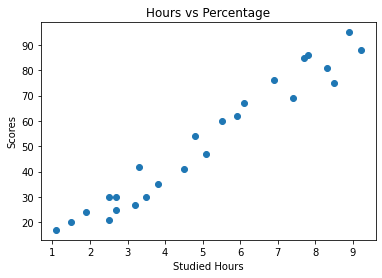

In [9]:
#Hours Vs Percentage of Scores
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

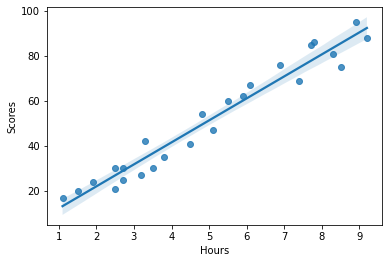

In [10]:
sns.regplot(x= df['Hours'], y= df['Scores'])

### Train-Test Split

In [11]:
# X will take all the values except for the last column which is our dependent variable (target variable)
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Model Building

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)       # train the model

LinearRegression()

In [15]:
pred_y= regressor.predict(X_test)    # prediction

In [16]:
pd.DataFrame({'Actual': y_test, 'Predicted': pred_y })      # view actual and predicted on test set side-by-side

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


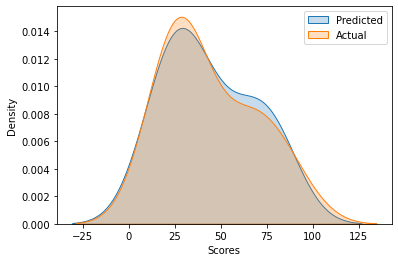

In [30]:
# Actual vs Predicted distribution plot

sns.kdeplot(pred_y, label='Predicted', shade= True)

sns.kdeplot(y_test, label= 'Actual', shade=True)

plt.legend()

In [25]:
print('Train accuracy:', round(regressor.score(X_train, y_train),4), '\nTest accuracy: ', round(regressor.score(X_test, y_test),4))

Train accuracy: 0.9485 
Test accuracy:  0.9568


#### Predict percent for custom input value for hours
* Ques. What will be predicted score if a student studies for 9.25 hrs/day?

In [29]:
h= [[9.25]]
s= regressor.predict(h)
print('A student who studies', h[0][0], 'Hours is estimated to score', round(s[0],2))

A student who studies 9.25 Hours is estimated to score 92.92


# Conclusion:
## A student who studies 9.25 Hours is estimated to score 92.92